In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.context_data_csv import ContextDataCSV
from utils.matrix_optimizer import MatrixOptimizer
import utils.sulfur.constant as const

from oasis.functions import deconvolve

In [9]:
engram_shock_cells = {
    'ID181106CreA': ['C261', 'C305', 'C347', 'C349', 'C351', 'C371'],
    'ID181106CreB': ['C058', 'C062', 'C089', 'C126', 'C138', 'C172'],
    'ID181106CreC': ['C017', 'C051', 'C065', 'C112', 'C117', 'C203', 'C214', 'C227'],
    'ID181106CreG': ['C127', 'C239', 'C270', 'C323', 'C347', 'C350', 'C399', 'C402'],
    'ID181106CreH': ['C164', 'C180', 'C184', 'C206', 'C243', 'C253', 'C298', 'C327', 'C351', 'C534', 'C542'],
    'ID181106CreI': ['C136', 'C197', 'C273', 'C292', 'C294', 'C306', 'C333'],
    'ID181106CreK': ['C083', 'C088', 'C100', 'C118', 'C137', 'C149', 'C203', 'C390'],
    'ID181106CreL': ['C200'],
    'ID181106CreN': ['C199', 'C255', 'C258', 'C273', 'C334'],
    'ID181106CreQ': ['C235', 'C393']
}

non_engram_shock_cells = {
    'ID181106CreA': ['C000', 'C007', 'C009', 'C059', 'C076', 'C084', 'C086', 'C099', 'C101', 'C116', 'C120', 'C124', 'C141', 'C143', 'C145', 'C153', 'C164', 'C173', 'C175', 'C197', 'C198', 'C228', 'C234', 'C235', 'C284', 'C303', 'C306', 'C310', 'C317', 'C325', 'C327', 'C328', 'C336', 'C362', 'C377', 'C442', 'C459', 'C476', 'C479', 'C480', 'C487', 'C491', 'C493', 'C494', 'C519'],
    'ID181106CreB': ['C000', 'C003', 'C009', 'C010', 'C063', 'C066', 'C071', 'C072', 'C073', 'C080', 'C083', 'C088', 'C090', 'C094', 'C100', 'C103', 'C108', 'C109', 'C112', 'C114', 'C115', 'C127', 'C130', 'C131', 'C134', 'C166', 'C168', 'C169', 'C177', 'C178', 'C179', 'C200', 'C202', 'C203', 'C213', 'C230', 'C231', 'C268', 'C279', 'C282', 'C284'],
    'ID181106CreC': ['C002', 'C011', 'C012', 'C016', 'C019', 'C043', 'C045', 'C049', 'C050', 'C054', 'C055', 'C056', 'C058', 'C060', 'C063', 'C070', 'C072', 'C074', 'C076', 'C079', 'C084', 'C086', 'C088', 'C096', 'C105', 'C107', 'C118', 'C127', 'C132', 'C143', 'C144', 'C146', 'C153', 'C155', 'C160', 'C168', 'C186', 'C192', 'C193', 'C194', 'C198', 'C202', 'C205', 'C215', 'C219', 'C224', 'C233', 'C235', 'C237', 'C238', 'C239', 'C241', 'C256', 'C257', 'C262', 'C268', 'C272', 'C276', 'C287', 'C294', 'C295', 'C296'],
    'ID181106CreG': ['C003', 'C004', 'C005', 'C010', 'C011', 'C017', 'C025', 'C063', 'C067', 'C070', 'C071', 'C073', 'C076', 'C089', 'C102', 'C118', 'C126', 'C133', 'C136', 'C142', 'C157', 'C166', 'C177', 'C193', 'C197', 'C199', 'C204', 'C205', 'C210', 'C212', 'C229', 'C232', 'C244', 'C247', 'C249', 'C253', 'C261', 'C273', 'C286', 'C291', 'C293', 'C294', 'C298', 'C302', 'C304', 'C305', 'C309', 'C313', 'C325', 'C338', 'C344', 'C352', 'C353', 'C361', 'C377', 'C385', 'C426', 'C449', 'C458', 'C478'],
    'ID181106CreH': ['C018', 'C021', 'C059', 'C074', 'C081', 'C085', 'C087', 'C125', 'C127', 'C148', 'C160', 'C175', 'C203', 'C218', 'C232', 'C249', 'C252', 'C256', 'C261', 'C268', 'C271', 'C350', 'C361', 'C385', 'C386', 'C395', 'C397', 'C400', 'C404', 'C411', 'C475', 'C490', 'C493', 'C497', 'C498', 'C505', 'C511', 'C520', 'C521', 'C525', 'C529', 'C541', 'C579', 'C594', 'C603', 'C632', 'C636'],
    'ID181106CreI': ['C012', 'C049', 'C061', 'C143', 'C164', 'C166', 'C176', 'C183', 'C214', 'C249', 'C254', 'C256', 'C270', 'C275', 'C281', 'C302', 'C325', 'C326', 'C327', 'C341', 'C352', 'C368'],
    'ID181106CreK': ['C006', 'C045', 'C066', 'C071', 'C075', 'C080', 'C085', 'C102', 'C114', 'C117', 'C123', 'C124', 'C133', 'C136', 'C145', 'C178', 'C180', 'C202', 'C205', 'C206', 'C207', 'C208', 'C233', 'C238', 'C239', 'C243', 'C251', 'C262', 'C267', 'C277', 'C291', 'C297', 'C323', 'C325', 'C341', 'C352', 'C361', 'C376', 'C380', 'C399', 'C403', 'C411', 'C424', 'C428'],
    'ID181106CreL': ['C008', 'C015', 'C020', 'C021', 'C037', 'C040', 'C044', 'C049', 'C061', 'C069', 'C073', 'C074', 'C075', 'C082', 'C085', 'C123', 'C125', 'C126', 'C128', 'C129', 'C132', 'C133', 'C144', 'C150', 'C155', 'C162', 'C173', 'C180', 'C185', 'C196', 'C203', 'C209', 'C211', 'C213', 'C216', 'C224', 'C231', 'C236', 'C243', 'C255', 'C270', 'C273', 'C283', 'C298', 'C312', 'C315', 'C323', 'C332', 'C341', 'C343', 'C344', 'C346', 'C350', 'C353', 'C357', 'C373', 'C414', 'C416', 'C424', 'C439', 'C445', 'C456', 'C461', 'C463', 'C475', 'C498', 'C501'],
    'ID181106CreN': ['C008', 'C022', 'C028', 'C044', 'C048', 'C057', 'C062', 'C069', 'C079', 'C089', 'C098', 'C123', 'C144', 'C168', 'C186', 'C201', 'C204', 'C213', 'C217', 'C227', 'C228', 'C239', 'C261', 'C267', 'C288', 'C290', 'C301', 'C306', 'C309', 'C321', 'C343', 'C355', 'C391', 'C395', 'C397', 'C402', 'C404', 'C410', 'C412', 'C413', 'C416', 'C425', 'C429', 'C441', 'C463', 'C469', 'C490', 'C506', 'C511', 'C517'],
    'ID181106CreQ': ['C000', 'C001', 'C006', 'C009', 'C019', 'C022', 'C033', 'C034', 'C040', 'C042', 'C050', 'C055', 'C057', 'C059', 'C061', 'C070', 'C076', 'C089', 'C092', 'C098', 'C108', 'C118', 'C121', 'C122', 'C123', 'C127', 'C132', 'C134', 'C137', 'C168', 'C169', 'C173', 'C179', 'C181', 'C192', 'C202', 'C205', 'C207', 'C209', 'C214', 'C217', 'C239', 'C260', 'C263', 'C281', 'C284', 'C305', 'C308', 'C316', 'C325', 'C332', 'C333', 'C335', 'C336', 'C343', 'C347', 'C354', 'C362', 'C365', 'C368', 'C372', 'C374', 'C375', 'C380', 'C387', 'C398', 'C412', 'C417', 'C421', 'C426', 'C431', 'C434', 'C455', 'C456', 'C463', 'C464', 'C470', 'C485', 'C491']
}

In [10]:
all_shock_cells = {}
for animal_name in engram_shock_cells.keys():
    all_shock_cells[animal_name] = engram_shock_cells[animal_name] + non_engram_shock_cells[animal_name]
    
all_shock_cells

{'ID181106CreA': ['C261',
  'C305',
  'C347',
  'C349',
  'C351',
  'C371',
  'C000',
  'C007',
  'C009',
  'C059',
  'C076',
  'C084',
  'C086',
  'C099',
  'C101',
  'C116',
  'C120',
  'C124',
  'C141',
  'C143',
  'C145',
  'C153',
  'C164',
  'C173',
  'C175',
  'C197',
  'C198',
  'C228',
  'C234',
  'C235',
  'C284',
  'C303',
  'C306',
  'C310',
  'C317',
  'C325',
  'C327',
  'C328',
  'C336',
  'C362',
  'C377',
  'C442',
  'C459',
  'C476',
  'C479',
  'C480',
  'C487',
  'C491',
  'C493',
  'C494',
  'C519'],
 'ID181106CreB': ['C058',
  'C062',
  'C089',
  'C126',
  'C138',
  'C172',
  'C000',
  'C003',
  'C009',
  'C010',
  'C063',
  'C066',
  'C071',
  'C072',
  'C073',
  'C080',
  'C083',
  'C088',
  'C090',
  'C094',
  'C100',
  'C103',
  'C108',
  'C109',
  'C112',
  'C114',
  'C115',
  'C127',
  'C130',
  'C131',
  'C134',
  'C166',
  'C168',
  'C169',
  'C177',
  'C178',
  'C179',
  'C200',
  'C202',
  'C203',
  'C213',
  'C230',
  'C231',
  'C268',
  'C279',
  'C282

In [14]:
df_index = const.ANIMAL_NAMES
df_columns = ['A2_1 shock', 'A2_1 non-shock', 'A1postES shock', 'A1postES non-shock']
df = pd.DataFrame(index=df_index, columns=df_columns)

for animal_name in const.ANIMAL_NAMES:
    print('animal name: %s' % animal_name)
    
    shock_cells = all_shock_cells[animal_name]
    
    # A2_1
    a2_1_context_data = ContextDataCSV(animal_name, 'A2_1')
    a2_1_df = a2_1_context_data.data_frame
    a2_1_df = MatrixOptimizer(a2_1_df).divide_sd()
    
    seconds = len(a2_1_df) / 10.0
    
    shock_event_rates = np.array([])
    non_shock_event_rates = np.array([])
    for cell_name, values in a2_1_df.iteritems():
        if values.isnull().all() or (values == 0).all():
            print('%s is nan' % cell_name)
            continue
                
        values.fillna(0.0, inplace=True)
        _c, spikes, _b, _g, _lam = deconvolve(values.to_numpy(), g=(None, None), penalty=1)
        
        event_rate = len(spikes[spikes >= 0.05]) / seconds
        if cell_name in shock_cells:
            shock_event_rates = np.append(shock_event_rates, event_rate)
        else:
            non_shock_event_rates = np.append(non_shock_event_rates, event_rate)
            
    df.loc[animal_name, 'A2_1 shock'] = np.mean(shock_event_rates)
    df.loc[animal_name, 'A2_1 non-shock'] = np.mean(non_shock_event_rates)
    
    
    # A1postES
    a1_context_data = ContextDataCSV(animal_name, 'A1postES')
    a1_df = a1_context_data.data_frame
    a1_df = MatrixOptimizer(a1_df).divide_sd()
    
    seconds = len(a1_df.iloc[1901:]) / 10.0
    
    shock_event_rates = np.array([])
    non_shock_event_rates = np.array([])
    for cell_name, values in a1_df.iteritems():
        if values.isnull().all() or (values == 0).all():
            continue
                
        values.fillna(0.0, inplace=True)
        _c, spikes, _b, _g, _lam = deconvolve(values.to_numpy(), g=(None, None), penalty=1)
        
        spikes = spikes[1901:]
        event_rate = len(spikes[spikes >= 0.05]) / seconds
        if cell_name in shock_cells:
            shock_event_rates = np.append(shock_event_rates, event_rate)
        else:
            non_shock_event_rates = np.append(non_shock_event_rates, event_rate)
            
    df.loc[animal_name, 'A1postES shock'] = np.mean(shock_event_rates)
    df.loc[animal_name, 'A1postES non-shock'] = np.mean(non_shock_event_rates)
    
df

animal name: ID181106CreA
C002 is nan
C005 is nan
C006 is nan
C010 is nan
C011 is nan
C014 is nan
C015 is nan
C017 is nan
C018 is nan
C028 is nan
C033 is nan
C036 is nan
C048 is nan
C049 is nan
C050 is nan
C051 is nan
C052 is nan
C053 is nan
C054 is nan
C055 is nan
C056 is nan
C057 is nan
C063 is nan
C067 is nan
C073 is nan
C074 is nan
C081 is nan
C085 is nan
C086 is nan
C087 is nan
C090 is nan
C093 is nan
C094 is nan
C099 is nan
C100 is nan
C102 is nan
C103 is nan
C104 is nan
C105 is nan
C109 is nan
C111 is nan
C115 is nan
C116 is nan
C118 is nan
C121 is nan
C126 is nan
C128 is nan
C129 is nan
C134 is nan
C138 is nan
C139 is nan
C140 is nan
C141 is nan
C142 is nan
C143 is nan
C153 is nan
C159 is nan
C161 is nan
C167 is nan
C168 is nan
C172 is nan
C174 is nan
C175 is nan
C185 is nan
C186 is nan
C187 is nan
C190 is nan
C193 is nan
C194 is nan
C195 is nan
C199 is nan
C201 is nan
C203 is nan
C204 is nan
C208 is nan
C210 is nan
C211 is nan
C212 is nan
C217 is nan
C220 is nan
C222 is nan
C2

C025 is nan
C026 is nan
C027 is nan
C028 is nan
C029 is nan
C030 is nan
C031 is nan
C032 is nan
C034 is nan
C035 is nan
C036 is nan
C037 is nan
C038 is nan
C039 is nan
C040 is nan
C041 is nan
C042 is nan
C291 is nan
C292 is nan
C293 is nan
C294 is nan
C295 is nan
C296 is nan
C297 is nan
C298 is nan
C299 is nan
C300 is nan
C301 is nan
C302 is nan
C303 is nan
C304 is nan
C305 is nan
C306 is nan
C307 is nan
C308 is nan
C309 is nan
C310 is nan
C311 is nan
C312 is nan
C313 is nan
C314 is nan
C315 is nan
C316 is nan
C317 is nan
C318 is nan
C319 is nan
C320 is nan
C321 is nan
C322 is nan
C323 is nan
C325 is nan
C326 is nan
C327 is nan
C328 is nan
C330 is nan
C331 is nan
C332 is nan
C333 is nan
C334 is nan
C335 is nan
C336 is nan
C338 is nan
C339 is nan
C340 is nan
C341 is nan
C342 is nan
C343 is nan
C344 is nan
C345 is nan
C346 is nan
C347 is nan
C348 is nan
C349 is nan
C350 is nan
C351 is nan
C352 is nan
C353 is nan
C354 is nan
C355 is nan
C356 is nan
C357 is nan
C358 is nan
C359 is nan
C361

C035 is nan
C036 is nan
C037 is nan
C038 is nan
C039 is nan
C040 is nan
C041 is nan
C042 is nan
C043 is nan
C044 is nan
C045 is nan
C046 is nan
C047 is nan
C048 is nan
C049 is nan
C050 is nan
C051 is nan
C052 is nan
C480 is nan
C481 is nan
C482 is nan
C483 is nan
C484 is nan
C485 is nan
C486 is nan
C487 is nan
C488 is nan
C489 is nan
C490 is nan
C491 is nan
C492 is nan
C493 is nan
C494 is nan
C495 is nan
C496 is nan
C497 is nan
C498 is nan
C499 is nan
C500 is nan
C501 is nan
C502 is nan
C503 is nan
C504 is nan
C505 is nan
C506 is nan
C507 is nan
C508 is nan
C509 is nan
C510 is nan
C511 is nan
C512 is nan
C514 is nan
C515 is nan
C516 is nan
C517 is nan
C518 is nan
C519 is nan
C521 is nan
C522 is nan
C523 is nan
C524 is nan
C525 is nan
C526 is nan
C527 is nan
C528 is nan
C529 is nan
C530 is nan
C531 is nan
C532 is nan
C533 is nan
C534 is nan
C535 is nan
C536 is nan
C537 is nan
C538 is nan
C539 is nan
C540 is nan
C541 is nan
C542 is nan
C544 is nan
C545 is nan
C546 is nan
C547 is nan
C548

C003 is nan
C005 is nan
C008 is nan
C009 is nan
C015 is nan
C016 is nan
C017 is nan
C019 is nan
C023 is nan
C026 is nan
C029 is nan
C030 is nan
C033 is nan
C092 is nan
C093 is nan
C094 is nan
C095 is nan
C096 is nan
C097 is nan
C098 is nan
C099 is nan
C100 is nan
C101 is nan
C102 is nan
C103 is nan
C104 is nan
C105 is nan
C106 is nan
C107 is nan
C108 is nan
C109 is nan
C110 is nan
C111 is nan
C112 is nan
C113 is nan
C114 is nan
C115 is nan
C116 is nan
C117 is nan
C118 is nan
C119 is nan
C120 is nan
C121 is nan
C122 is nan
C123 is nan
C133 is nan
C135 is nan
C137 is nan
C138 is nan
C140 is nan
C141 is nan
C145 is nan
C152 is nan
C153 is nan
C154 is nan
C156 is nan
C158 is nan
C159 is nan
C161 is nan
C163 is nan
C165 is nan
C167 is nan
C169 is nan
C170 is nan
C178 is nan
C181 is nan
C182 is nan
C185 is nan
C186 is nan
C188 is nan
C191 is nan
C195 is nan
C204 is nan
C205 is nan
C207 is nan
C208 is nan
C209 is nan
C210 is nan
C213 is nan
C215 is nan
C217 is nan
C219 is nan
C220 is nan
C221

C003 is nan
C012 is nan
C013 is nan
C027 is nan
C033 is nan
C034 is nan
C035 is nan
C036 is nan
C037 is nan
C043 is nan
C048 is nan
C050 is nan
C053 is nan
C055 is nan
C059 is nan
C061 is nan
C064 is nan
C069 is nan
C076 is nan
C079 is nan
C084 is nan
C089 is nan
C093 is nan
C094 is nan
C096 is nan
C098 is nan
C099 is nan
C103 is nan
C106 is nan
C109 is nan
C112 is nan
C119 is nan
C128 is nan
C134 is nan
C136 is nan
C137 is nan
C138 is nan
C146 is nan
C147 is nan
C149 is nan
C151 is nan
C154 is nan
C156 is nan
C158 is nan
C165 is nan
C167 is nan
C169 is nan
C172 is nan
C178 is nan
C180 is nan
C183 is nan
C185 is nan
C186 is nan
C200 is nan
C204 is nan
C206 is nan
C211 is nan
C212 is nan
C215 is nan
C216 is nan
C218 is nan
C222 is nan
C223 is nan
C226 is nan
C234 is nan
C239 is nan
C243 is nan
C248 is nan
C249 is nan
C256 is nan
C264 is nan
C265 is nan
C271 is nan
C273 is nan
C275 is nan
C277 is nan
C280 is nan
C284 is nan
C285 is nan
C286 is nan
C289 is nan
C290 is nan
C291 is nan
C292

C000 is nan
C003 is nan
C004 is nan
C008 is nan
C011 is nan
C020 is nan
C043 is nan
C046 is nan
C052 is nan
C053 is nan
C058 is nan
C059 is nan
C065 is nan
C072 is nan
C073 is nan
C075 is nan
C078 is nan
C079 is nan
C083 is nan
C085 is nan
C099 is nan
C101 is nan
C102 is nan
C103 is nan
C108 is nan
C119 is nan
C127 is nan
C128 is nan
C131 is nan
C132 is nan
C136 is nan
C140 is nan
C142 is nan
C143 is nan
C147 is nan
C154 is nan
C155 is nan
C160 is nan
C166 is nan
C169 is nan
C172 is nan
C174 is nan
C178 is nan
C180 is nan
C181 is nan
C186 is nan
C187 is nan
C188 is nan
C191 is nan
C192 is nan
C196 is nan
C197 is nan
C199 is nan
C207 is nan
C211 is nan
C212 is nan
C214 is nan
C218 is nan
C221 is nan
C224 is nan
C226 is nan
C227 is nan
C229 is nan
C231 is nan
C235 is nan
C238 is nan
C240 is nan
C241 is nan
C250 is nan
C251 is nan
C254 is nan
C256 is nan
C257 is nan
C259 is nan
C265 is nan
C270 is nan
C274 is nan
C276 is nan
C277 is nan
C278 is nan
C279 is nan
C280 is nan
C285 is nan
C287

C001 is nan
C007 is nan
C009 is nan
C027 is nan
C028 is nan
C029 is nan
C031 is nan
C033 is nan
C036 is nan
C038 is nan
C041 is nan
C061 is nan
C066 is nan
C068 is nan
C079 is nan
C081 is nan
C099 is nan
C102 is nan
C109 is nan
C112 is nan
C116 is nan
C124 is nan
C127 is nan
C132 is nan
C142 is nan
C151 is nan
C152 is nan
C154 is nan
C157 is nan
C162 is nan
C164 is nan
C170 is nan
C172 is nan
C174 is nan
C182 is nan
C196 is nan
C205 is nan
C206 is nan
C209 is nan
C211 is nan
C214 is nan
C222 is nan
C224 is nan
C225 is nan
C228 is nan
C234 is nan
C236 is nan
C237 is nan
C241 is nan
C242 is nan
C245 is nan
C246 is nan
C250 is nan
C251 is nan
C261 is nan
C265 is nan
C266 is nan
C273 is nan
C274 is nan
C276 is nan
C279 is nan
C289 is nan
C292 is nan
C293 is nan
C299 is nan
C307 is nan
C310 is nan
C311 is nan
C314 is nan
C315 is nan
C316 is nan
C317 is nan
C327 is nan
C328 is nan
C332 is nan
C340 is nan
C341 is nan
C342 is nan
C345 is nan
C352 is nan
C356 is nan
C360 is nan
C363 is nan
C370

,A2_1 shock,A2_1 non-shock,A1postES shock,A1postES non-shock
ID181106CreA,0.690506,0.640201,1.607442,0.901362
ID181106CreB,1.184661,1.077545,1.409484,1.240715
ID181106CreC,1.275888,1.126731,1.507609,1.061019
ID181106CreG,1.145231,0.906704,1.658951,1.071637
ID181106CreH,0.569382,0.549279,1.283394,0.984956
ID181106CreI,0.677072,0.693868,1.206897,0.855083
ID181106CreK,1.020433,0.900708,1.426227,1.071804
ID181106CreL,1.076828,0.9285,1.546878,1.185127
ID181106CreN,0.932455,0.840595,1.443376,0.976731
ID181106CreQ,1.038149,0.921277,1.462033,1.08628


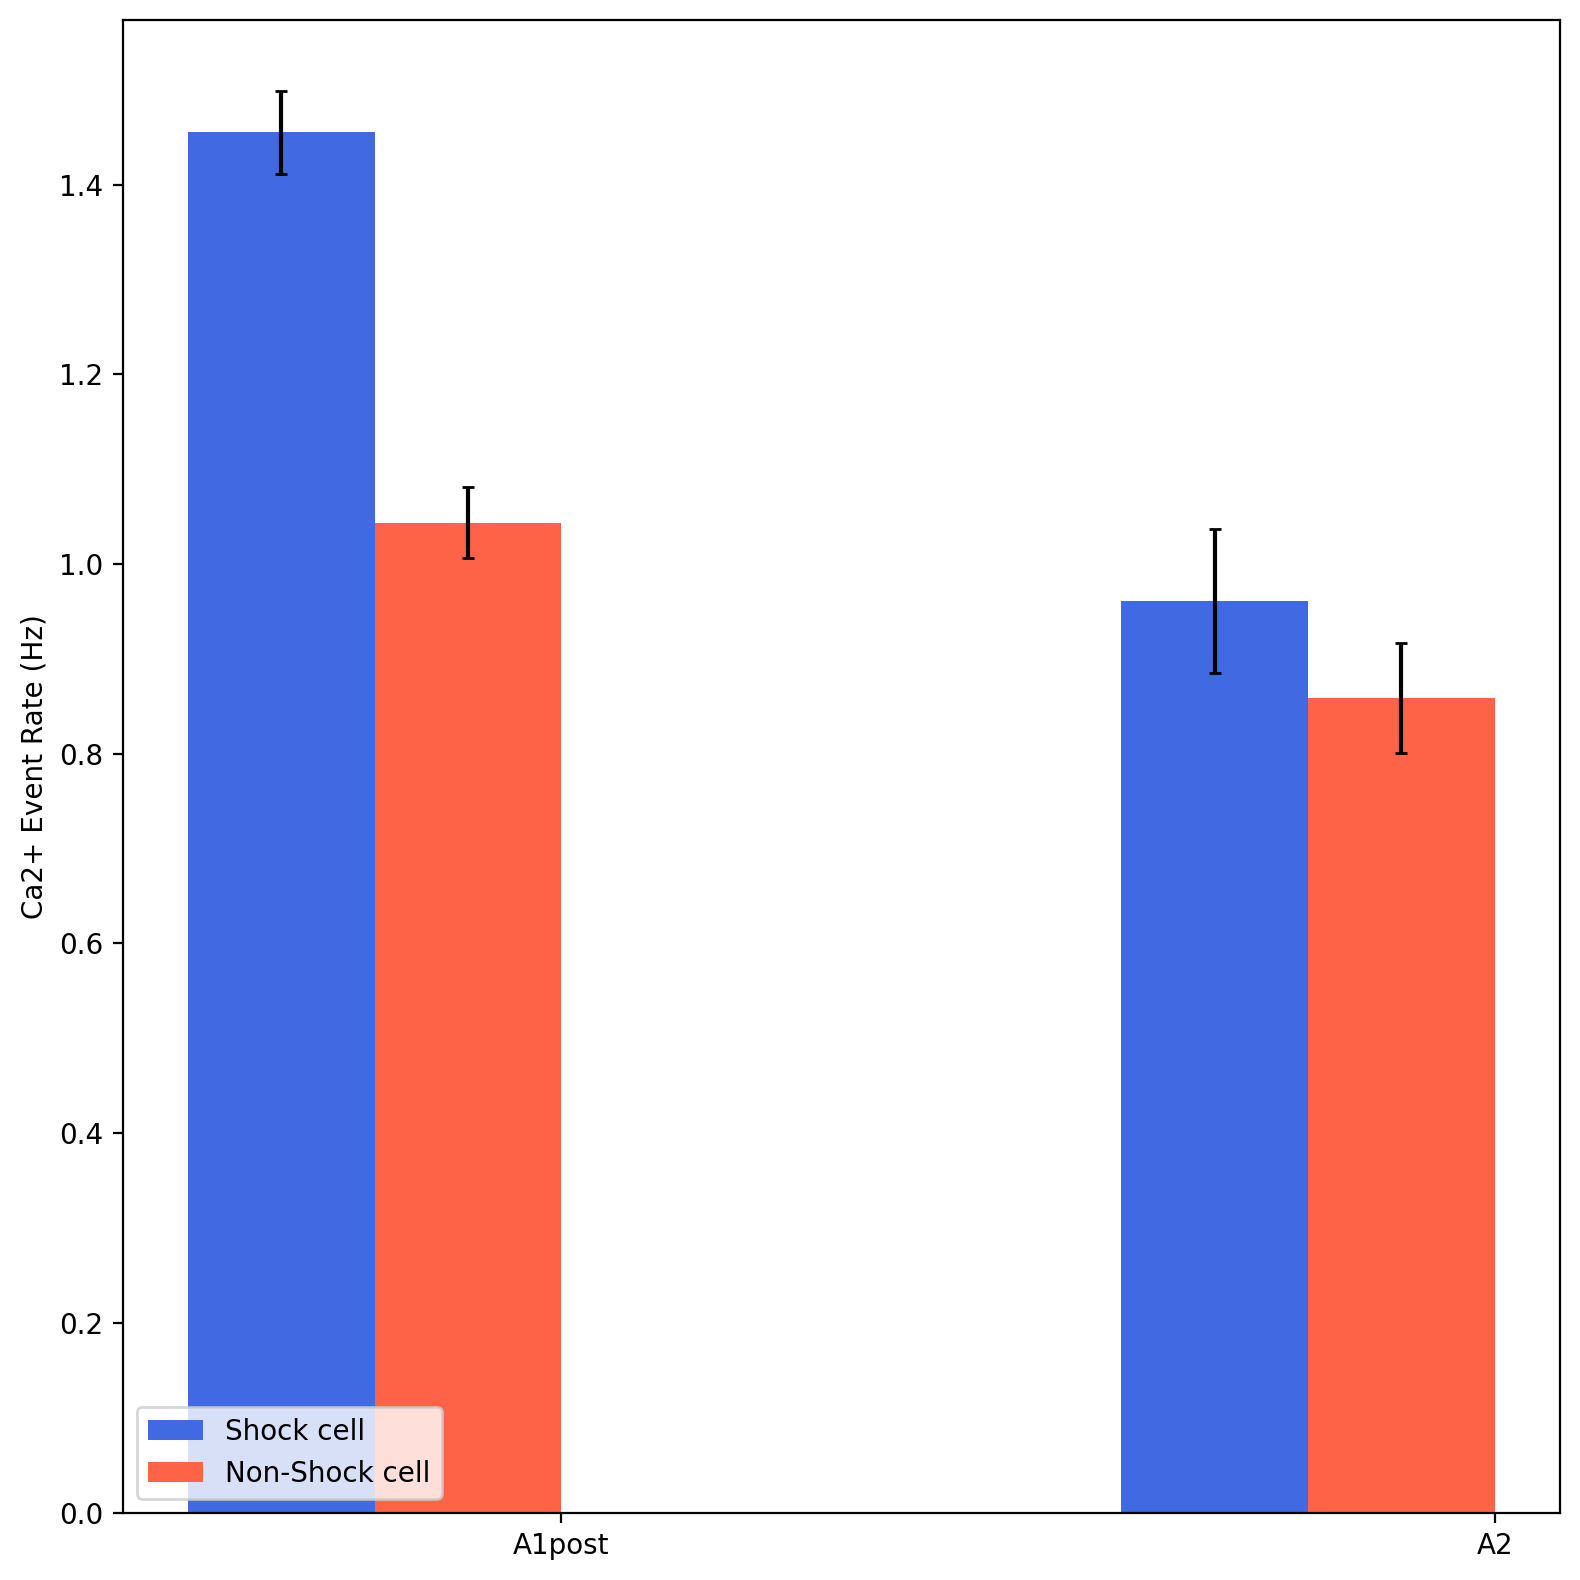

In [20]:
labels = ['A1post', 'A2']

shock = df.loc[:, ['A1postES shock', 'A2_1 shock']]
non_shock = df.loc[:, ['A1postES non-shock', 'A2_1 non-shock']]

shock_mean, shock_sem = shock.mean(), shock.sem()
non_shock_mean, non_shock_sem = non_shock.mean(), non_shock.sem()

fig, ax = plt.subplots(1, figsize=(8, 8), dpi=200, tight_layout=True)

left = np.arange(-0.1, 1.1, 1.0)
width = 0.20

ax.bar(x=left - width, height=shock_mean, yerr=shock_sem, capsize=2, width=width, label='Shock cell', align='center', color='royalblue')
ax.bar(x=left, height=non_shock_mean, yerr=non_shock_sem, capsize=2, width=width, label='Non-Shock cell', align='center', color='tomato')
ax.set_xticks([0.0, 1.0])
ax.set_xticklabels(labels=labels)

#ax.set_ylim(0, 2.0)
ax.set_ylabel('Ca2+ Event Rate (Hz)')
ax.legend(loc='lower left')

plt.show()